# HW 3 - Package Exploration
### Package - Latexify.jl
Madison Maloney

This notebook gives an overview of Julia's Latexify package. Latexify can be used to provide LaTeX formatting for objects in Julia. The formatted objects can be displayed within the Julia environment, and the formatting string can also be copied to a user's clipboard and pasted into an environment that accepts LaTeX formatting.

Version used: 1.2.0

Package used: Latexify.jl

Features explored: 

Reference: https://pkg.julialang.org/docs/Latexify

In [12]:
VERSION

v"1.2.0"

First you need to add the Latexify package and prepare to use it by implementing the code block below.

In [37]:
using Pkg
Pkg.add("Latexify")
using Latexify

 Resolving package versions...
  Updating `C:\Users\madis\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\madis\.julia\environments\v1.2\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\madis\.julia\environments\v1.2\Project.toml`
  [37e2e46d] + LinearAlgebra 
  Updating `C:\Users\madis\.julia\environments\v1.2\Manifest.toml`
 [no changes]


## Basic Latexify

Latexify works for the following Julia object types:
* Expressions
* Strings
* Numbers
* Missings' Missing type (references Missings.jl)
* Symbols
* Symbolic expressions (references SymEngine.jl)
* DataFrame (references DataFrames.jl)
* Any shape of array containing a mix of any of the above types
* ParameterizedFunctions (references DifferentialEquations.jl)
* ReactionNetworks (references DifferentialEquations.jl)

Supported LaTeX output environments include:
* no env (:raw)
* inline (:inline)
* align (:align)
* equation (:equation)
* array (:array)
* tabular (:table)
* markdown table (:mdtable)
* markdown text (:mdtext)
* chemical arrow notation (:chem)

Latexify automatically chooses and implements an output environment based on the inputs to the latexify function, but users can enforce a different output environment by executing

    env = () 

where () is filled by one of the enclosed examples from the list above (i.e. env = :table)


For basic functionality, this notebook will focus on a few inputs that do not rely on any other packages. For more information on the inputs which interact with other packages, refer to the documentation linked at the top of this notebook.

To use the basic latexify function of this package, define an input and call latexify, giving it the input that was just defined.

__Expressions__

The example below defines an expression and latexifies it.

In [111]:
exp = :(1+3/x^2-e^-1);
@show typeof(exp)
latexify(exp)

typeof(exp) = Expr


L"$1 + \frac{3}{x^{2}} - e^{-1}$"

__Strings__

The example below defines a string and latexifies it.

In [112]:
str = "beta(n)*e^(-2x)/(x+n!)-(log10(x/n))"
@show typeof(str)
latexify(str)

typeof(str) = String


L"$\frac{\beta\left( n \right) \cdot e^{-2 \cdot x}}{x + n!} - \log_{10}\left( \frac{x}{n} \right)$"

__Numbers__

The example below defines an array of numbers and latexifies it.

In [114]:
A = [1 2 3;4 5 6;7 8 9]
@show typeof(A)
as = latexify(A)

typeof(A) = Array{Int64,2}


L"\begin{equation}
\left[
\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{array}
\right]
\end{equation}
"

## Copy to Clipboard

The function copy_to_clipboard can be used to copy the formatting string for the LaTeX-formatted object to a computer's clipboard. This string can conveniently be pasted into any interface that accepts LaTeX formatting. Once copy_to_clipboard is set to true, it will continue to copy to the clipboard for subsequent latexify calls until it is set to false.

__Example__

In [122]:
c = "x/(2*k_1+x^2)"
copy_to_clipboard(true)
latexify(c)

L"$\frac{x}{2 \cdot k_{1} + x^{2}}$"

If you run the code block above, the formatting string for c will be copied to your clipboard. Pasting after running the code block yields:

    $\frac{x}{2 \cdot k_{1} + x^{2}}$
    
You can test out the formatting string by pasting it into an interface such as Overleaf.

## Formatting

Latexify allows you to format the numbers in the output. A few helpful examples include printf formatting, significant digit specification (using FancyNumberFormatting within Latexify.jl), digits beyond the decimal (using FancyNumberFormatting within Latexify.jl), and exponential formatting (using StyledNumberFormatting within Latexify.jl).

In [145]:
num = pi
latexify(num;fmt = "%.3f")
# notice number of digits after decimal

L"$3.142$"

In [143]:
num2 = 1486480
latexify(num2;fmt = "%.4e")
# notice number of digits after decimal and exp form

L"$1.4865e+06$"

In [156]:
num3 = 1.200100
latexify(num3;fmt = FancyNumberFormatter(2))
# notice significant digits

num3 = 1.2001


L"$1.2$"

In [169]:
num4 = 12345e3
latexify(num4;fmt = FancyNumberFormatter(3))
# notice the exp form now appears as *10^7

L"$1.23 \cdot 10^{7}$"

You can also set default formatting by using set_default.

In [171]:
set_default(fmt = "%.5f")
latexify(123.456)
# notice formatting was implemented without including fmt in the latexify call

L"$123.45600$"

## Realistic Example

Imagine you have written code for a project but are cutting it close to the deadline to submit your code along with a write-up of your results. Rather than wasting time writing the relevant equations in LaTeX format for your write up, you can use the Latexify package to save the day.


In [203]:
A = [5 5 -1;10 10 -2;15 15 -3];
latexify(A,fmt = "%.1f")

L"\begin{equation}
\left[
\begin{array}{ccc}
5.0 & 5.0 & -1.0 \\
10.0 & 10.0 & -2.0 \\
15.0 & 15.0 & -3.0 \\
\end{array}
\right]
\end{equation}
"

In [204]:
x = [2.4;-1.1;5.9];
latexify(x,fmt = "%.1f")

L"\begin{equation}
\left[
\begin{array}{c}
2.4 \\
-1.1 \\
5.9 \\
\end{array}
\right]
\end{equation}
"

In [206]:
b = A*x;
latexify(b,fmt = "%.1f") 

L"\begin{equation}
\left[
\begin{array}{c}
0.6 \\
1.2 \\
1.8 \\
\end{array}
\right]
\end{equation}
"

In [208]:
eqn = "Ax=b"
latexify(eqn)

L"$Ax = b$"

Pasting these into Overleaf, I can quickly get:

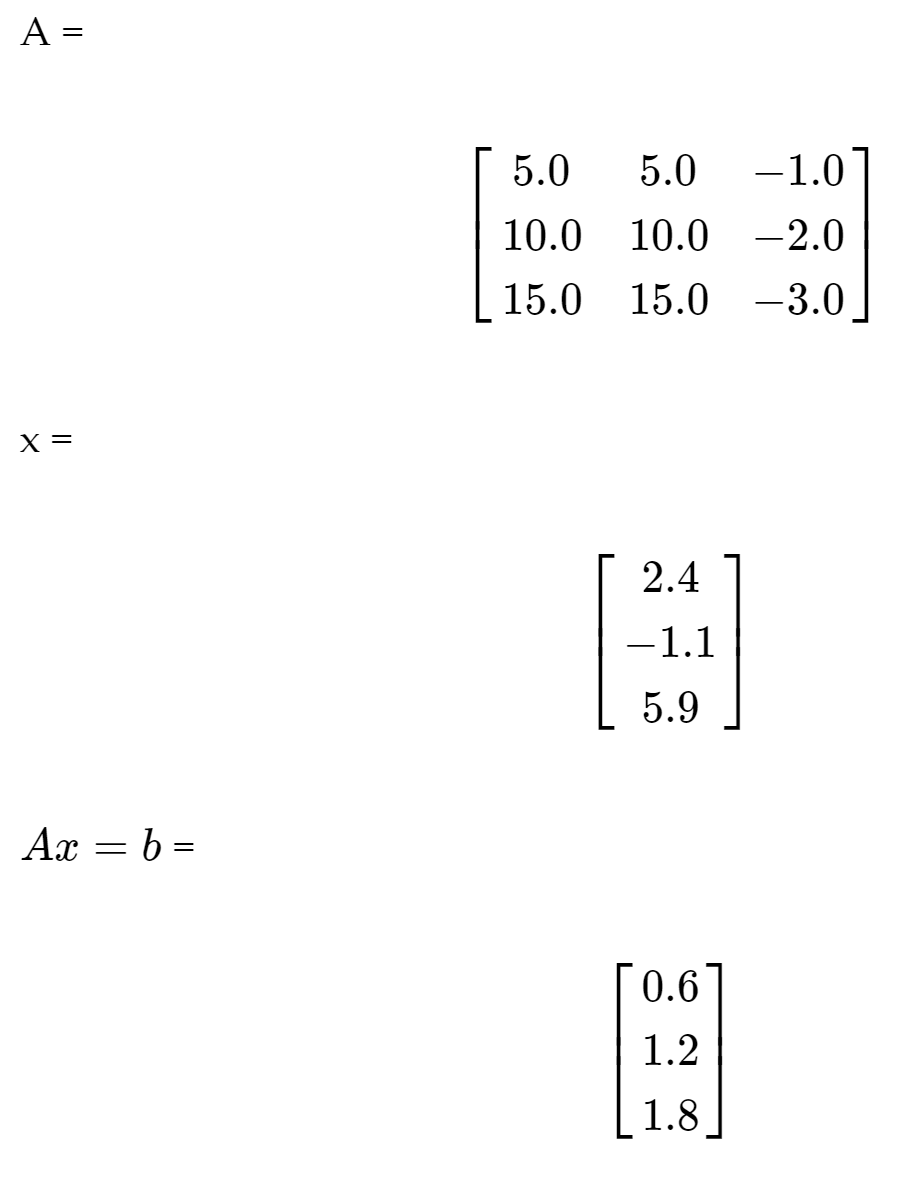

This saves time and could even help you catch a mistake in your equation if the LaTeX version looks different than the equation you thought you implemented.